# Laboratorium 2 Interpolacja
### Autor: Krzysztof Hardek

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import math as m

## Zad 1 Wielomiany interpolujące
#### Definicje funkcji:

In [16]:
def f(x):
    return (1 + (x ** 2)) ** -1

def interpolation(f, n):
    nodes = np.linspace(-5, 5, n+1)
    main_arr = np.vander(nodes, increasing=True)
    y_list = [f(x) for x in nodes]
    
    x_list = np.linalg.solve(main_arr, y_list)
    
    return x_list


def new_function(x, x_list):
    sum = 0
    for i in range(len(x_list)):
        sum += x_list[i] * (x ** i)
        
    return sum

#### Wykresy funkcji:
Dla n = 5:

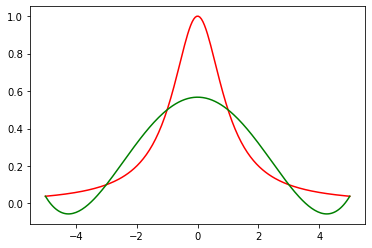

In [17]:
x_points = np.linspace(-5, 5, 200) 
y_points = [f(x) for x in x_points]
plt.plot(x_points, y_points, 'r')

y_points = [new_function(x, interpolation(f, 5)) for x in x_points]
plt.plot(x_points, y_points, 'g')
plt.show()

Dla n = 10:

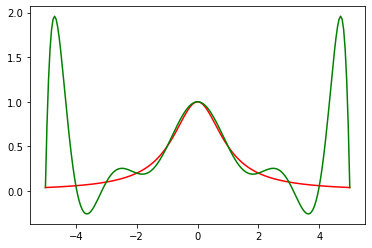

In [18]:
x_points = np.linspace(-5, 5, 200) 
y_points = [f(x) for x in x_points]
plt.plot(x_points, y_points, 'r')

y_points = [new_function(x, interpolation(f, 10)) for x in x_points]
plt.plot(x_points, y_points, 'g')
plt.show()

Dla n = 15:

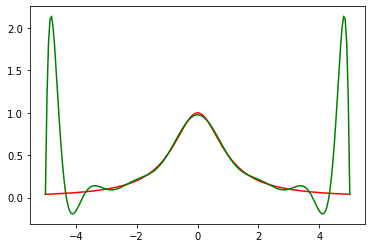

In [19]:
x_points = np.linspace(-5, 5, 200) 
y_points = [f(x) for x in x_points]
plt.plot(x_points, y_points, 'r')

y_points = [new_function(x, interpolation(f, 15)) for x in x_points]
plt.plot(x_points, y_points, 'g')
plt.show()

#### Reszty interpolacji:
Dla n = 5

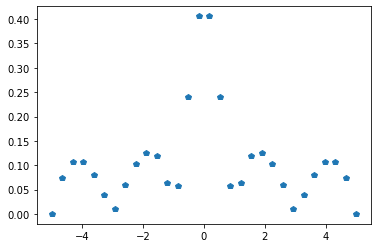

In [20]:
points = np.linspace(-5, 5, 30)
error = [abs(f(x) - new_function(x, interpolation(f, 5))) for x in points]
plt.plot(points, error, 'p')
plt.show()

Dla n = 10:

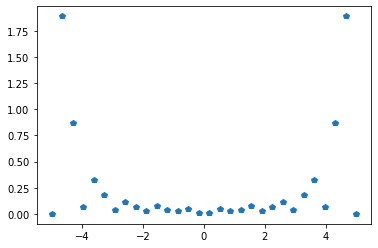

In [21]:
points = np.linspace(-5, 5, 30)
error = [abs(f(x) - new_function(x, interpolation(f, 10))) for x in points]
plt.plot(points, error, 'p')
plt.show()

Dla n = 15:

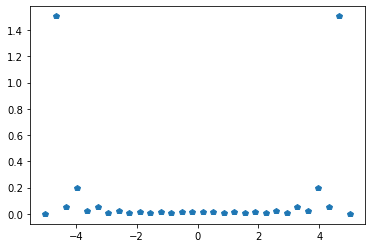

In [22]:
points = np.linspace(-5, 5, 30)
error = [abs(f(x) - new_function(x, interpolation(f, 15))) for x in points]
plt.plot(points, error, 'p')
plt.show()

#### Wnioski:
Wraz ze wzrostem węzłów obliczeniowych poprawia się przybliżenie (mniejszy error). Nie dotyczy to jednak punktów skrajnych,
w których wartości funkcji przybliżonej znacznie odbiegają od rzeczywistych. To zjawisko nosi nazwę efektu Rungego.

## Zadanie 2 Wielomiany interpolujące
#### Definicja funkcji określającej węzły Czebyszewa oraz obliczenie współczynników wielomianu:

In [23]:
def fk(k):
    return -5 * m.cos(((2*k-1)*m.pi)/32)


points = np.linspace(1, 16, 16)
nodes = [fk(k) for k in points]
main_arr = np.vander(nodes, increasing=True)
y_list = [f(x) for x in nodes]

x_list = np.linalg.solve(main_arr, y_list)

#### Wykres funkcji:

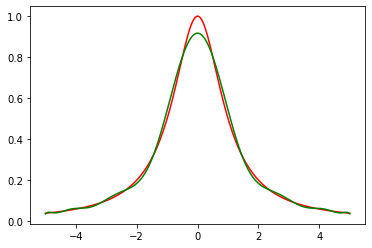

In [24]:
x_points = np.linspace(-5, 5, 200)
y_points = [f(x) for x in x_points]
plt.plot(x_points, y_points, 'r')

y_points = [new_function(x, x_list) for x in x_points]
plt.plot(x_points, y_points, 'g')
plt.show()

#### Wnioski:
Po użyciu węzłów Czebyszewa przybliżenie wygląda dużo sensowniej. Odstające wartości na krańcach przedziału zostały wyelimnowane kosztem większego błędu na środku przedziału. Udało się to zrealizować poprzez odpowiednie wyspecyfikowanie 
gęstości występowania węzłów obliczeniowych. W poprzednim przykładzie błąd był bardzo mały na środku oraz bardzo duży na krańcach. Aby to uśrednić naturalnym krokiem jest zmniejszenie ilości punktów w centrum (zwiększy to błąd w tym obszarze) oraz wstawienie ich na końach przedziału (zmniejszenie błędu), co jest realizowane przez funkcje cosinus.

## Zadanie 3 Interpolacja krzywych funkcjami sklejanymi


#### Wykres idealnej elipsa:

In [25]:
points = np.linspace(0, m.pi*2, 200) # x = cos(t), y = 2 * sin(t)
x_points = [m.cos(t) for t in points]
y_points = [2*m.sin(t) for t in points]

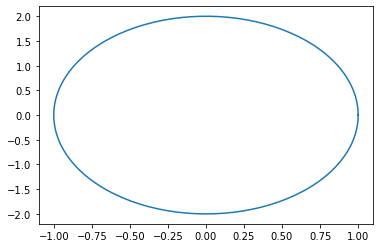

In [26]:
plt.plot(x_points, y_points)
plt.show()

#### Definicje funkcji:

Algorytm został zaczerpnięty z wikipedii: https://en.wikipedia.org/wiki/Spline_(mathematics)

In [27]:
def ellipse(t):
    return (m.cos(t), 2*m.sin(t))

def spline_set_generator(curve, nodes, coord_pos): 
    n = len(nodes) - 1
    a = np.zeros(n+1)
    for i in range(n+1):
        if coord_pos == 0:
            a[i] = m.cos(nodes[i])   
        if coord_pos == 1:
            a[i] = 2 * m.sin(nodes[i])
    b = np.zeros(n)
    d = np.zeros(n)
    h = np.zeros(n)
    
    for i in range(n):
        h[i] = nodes[i+1] - nodes[i]
    alfa = np.zeros(n)
    for i in range(1, n):
        alfa[i] = (3*(a[i+1] - a[i])/h[i]) - (3*(a[i] - a[i-1])/h[i-1]) 
    c = np.zeros(n+1)
    l = np.zeros(n+1)
    u = np.zeros(n+1)
    z = np.zeros(n+1)
    l[0] = 1
    u[0] = 0
    z[0] = 0
    for i in range(1, n):
        l[i] = 2*(nodes[i+1] - nodes[i-1]) - h[i-1] * u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alfa[i] - h[i-1] * h[i-1])/l[i]
    l[n] = 1
    z[n] = 0
    c[n] = 0
    for i in range(n-1, -1, -1):
        c[i] = z[i] - u[i] * c[i+1]
        b[i] = ((a[i+1] - a[i]) / h[i]) - (h[i] * (c[i+1] + 2 * c[i]) / 3)
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        
    spline_set_coeff_matrix = np.zeros((n, 5))
                                       
    
                                       
    for i in range(n):
        spline_set_coeff_matrix[i][0] = a[i]
        spline_set_coeff_matrix[i][1] = b[i]
        spline_set_coeff_matrix[i][2] = c[i]
        spline_set_coeff_matrix[i][3] = d[i]
        spline_set_coeff_matrix[i][4] = nodes[i]
    return spline_set_coeff_matrix

def new_spline_function(t, spline_set_coeff_matrix):
    spline_index = int(m.floor((t / (2 * m.pi)) * 9))
    if spline_index >= 9:
        spline_index = 8
    a = spline_set_coeff_matrix[spline_index][0]
    b = spline_set_coeff_matrix[spline_index][1]
    c = spline_set_coeff_matrix[spline_index][2]
    d = spline_set_coeff_matrix[spline_index][3]
    xj = spline_set_coeff_matrix[spline_index][4]
    
    return a + b * (t - xj) + c * ((t - xj) ** 2) + d * ((t - xj) ** 3)
    

#### Wykres przypliżonej elipsy:
Użyte zostało 10 punktów interpolacji. Wykres został wykonany dla 30 punktów próbkujących.

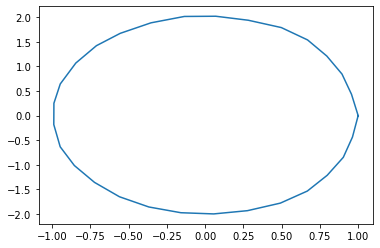

In [28]:
nodes = np.linspace(0, m.pi * 2, 10)

spline_set_x = spline_set_generator(ellipse, nodes, 0)
spline_set_y = spline_set_generator(ellipse, nodes, 1)

params = np.linspace(0, m.pi * 2, 30)

x_points = [new_spline_function(t, spline_set_x) for t in params]
y_points = [new_spline_function(t, spline_set_y) for t in params]

plt.plot(x_points, y_points)
plt.show()

#### Wnioski:
Dla relatywnie małej liczby węzłów obliczeniowych, interpolacja dobrze oddaje kształt elipsy. Nie pojawiają się znacznie odstające wartości i nie obserwujemy żadnego efektu podobnego do efektu Rungego. Interpolacja splajnami wydaje się być dobrą alternatywą dla poprzednich metod.